In [1]:
import os
import pandas as pd
import numpy as np

df = pd.read_csv('data.csv')


In [3]:
df.head(5)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [4]:
# Data Preprocessing or Data Cleaning

# Bad data handling
# 1.Empty values
# 2.Wrong formats   30/05/2025       30052025   30-05-2025
# 3.Wrong data      Age 23           -23     123,    20   to 29  129
# 4.Duplicates       More entries for the same person

In [5]:
# print empty values
print(df.isnull().sum())

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64


In [6]:
print(df.dtypes) # Check data types of each column

Duration      int64
Pulse         int64
Maxpulse      int64
Calories    float64
dtype: object


In [7]:
# checking for negative values in specific columns
for col in ['Duration', 'Pulse', 'Maxpulse', 'Calories']:
    if (df[col] < 0).any():
        print(f"Negative values found in {col} column")

In [8]:
# checking for duplicates
duplicates = df.duplicated()
if duplicates.any():
    print("Duplicates found:")
    print(df[duplicates])
else:
    print("No duplicates found.")

Duplicates found:
     Duration  Pulse  Maxpulse  Calories
36         60    102       127     300.0
37         60    100       120     300.0
38         60    100       120     300.0
40         45     90       112     180.1
71         60    109       153     387.6
113        45    100       120     225.3
155        60    111       151     368.5


In [9]:
# recommendations principles for data cleaning
# 1. Handle fill empty values/cells
# 2. Convert wrong formats
# 3. Correct wrong data
# 4. Remove duplicates in rows not in columns

In [10]:
# fill empty values with mean for numeric columns
for col in ['Duration', 'Pulse', 'Maxpulse', 'Calories']:
    df[col].fillna(df[col].mean(), inplace=True)

/var/folders/yt/5_7q2b097jb7y240727851740000gn/T/ipykernel_50393/2171282240.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [11]:
df.head(30) #first 30 rows

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.100000
1,60,117,145,479.000000
2,60,103,135,340.000000
3,45,109,175,282.400000
4,45,117,148,406.000000
5,60,102,127,300.000000
6,60,110,136,374.000000
7,45,104,134,253.300000
8,30,109,133,195.100000
9,60,98,124,269.000000


In [12]:
print(df.isnull().sum())  # Check if there are still any empty values

Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64


In [13]:
# shape of dataset(exploratory data analysis)
print(df.shape)

(169, 4)


In [15]:
print('Summary statistics:')
df.describe() # Summary statistics for numeric columns

Summary statistics:


,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,169.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,262.385991
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,253.300000
50%,60.000000,105.000000,131.000000,321.000000
75%,60.000000,111.000000,141.000000,384.000000
max,300.000000,159.000000,184.000000,1860.400000


In [17]:
# data viz
import matplotlib.pyplot as plt
import seaborn as sns

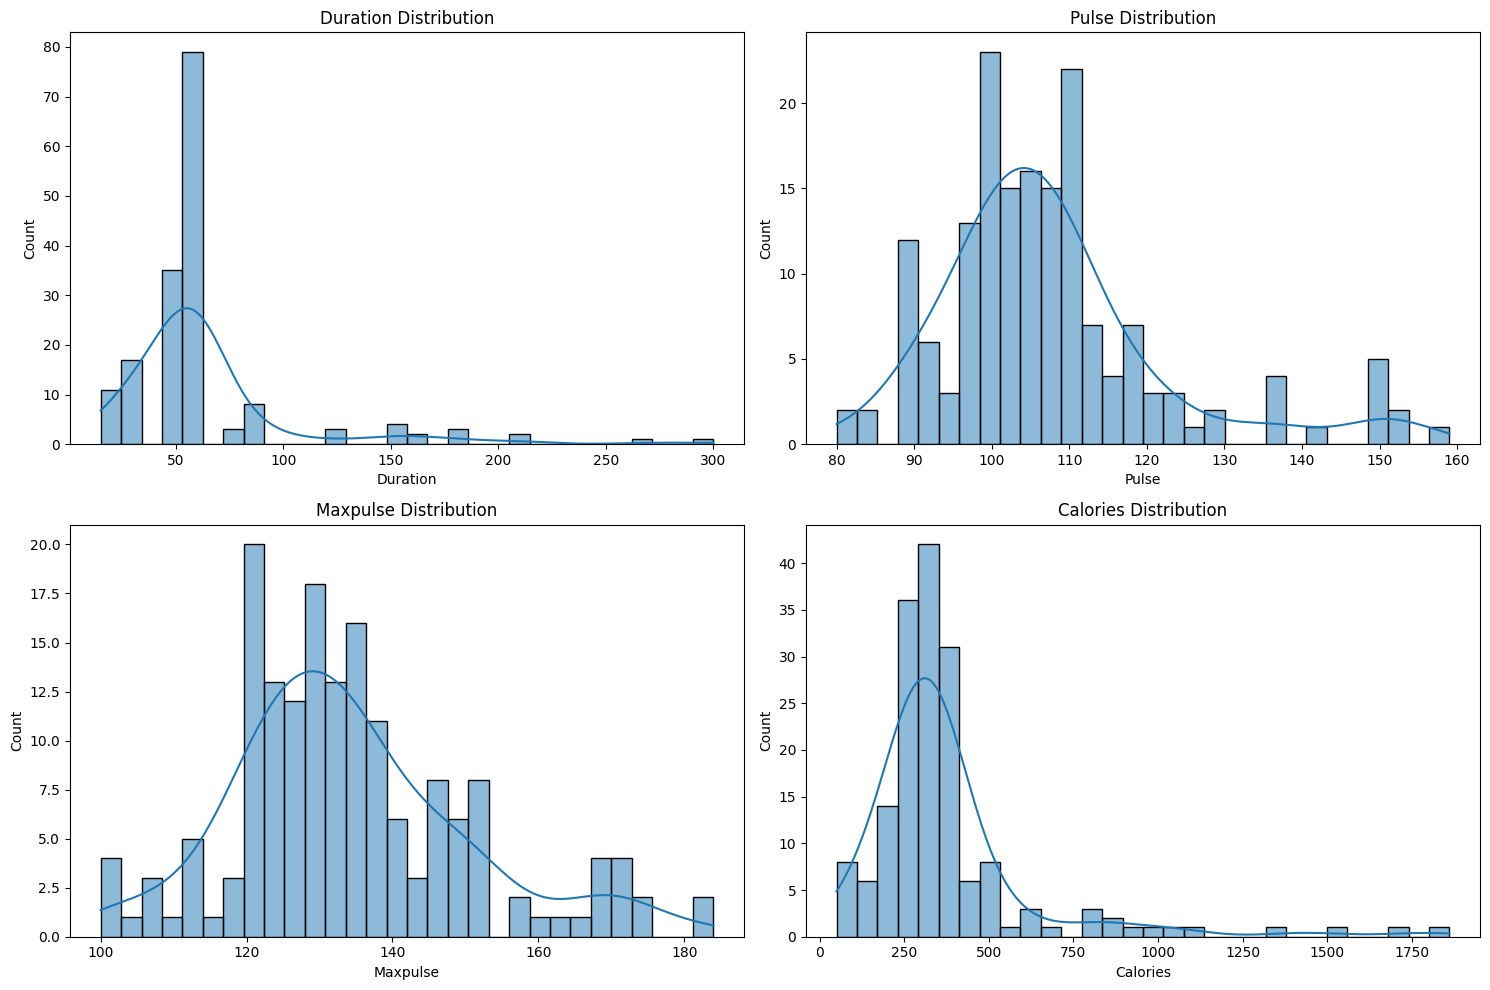

In [19]:
# histogram of 'Duration'
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
sns.histplot(df['Duration'], bins=30, kde=True)
plt.title('Duration Distribution')

# histogram of pulse
plt.subplot(2, 2, 2)
sns.histplot(df['Pulse'], bins=30, kde=True)
plt.title('Pulse Distribution')

# Exercise Plot for Maxpulse and Colories for Histrogram
# maxpulse
plt.subplot(2, 2, 3)
sns.histplot(df['Maxpulse'], bins=30, kde=True)
plt.title('Maxpulse Distribution')
# calories
plt.subplot(2, 2, 4)
sns.histplot(df['Calories'], bins=30, kde=True)
plt.title('Calories Distribution')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Pulse vs Calories')

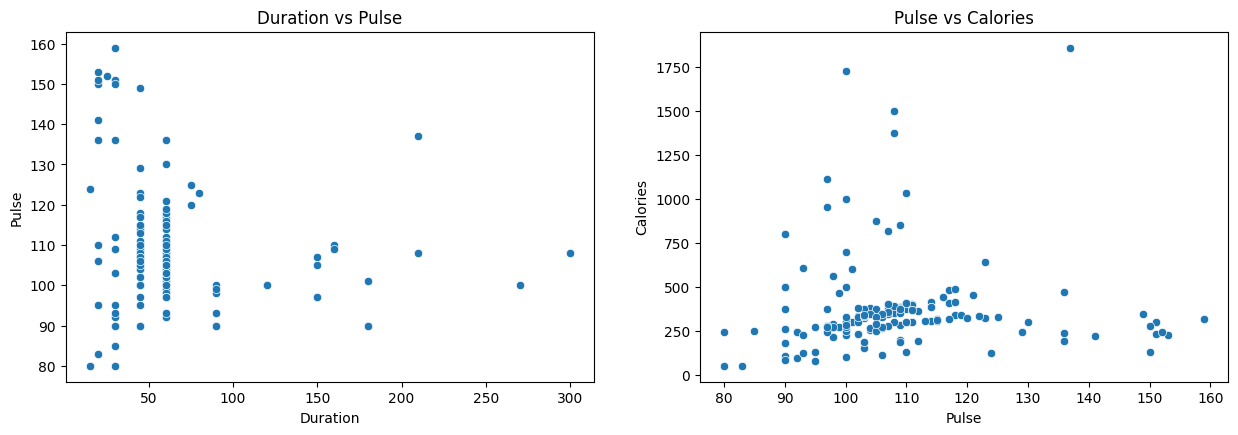

In [20]:
# scatter plot of 'Duration' vs 'Pulse'
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
sns.scatterplot(x='Duration', y='Pulse', data=df)
plt.title('Duration vs Pulse')

# scatter plot of pulse vs calories
plt.subplot(2, 2, 2)
sns.scatterplot(x='Pulse', y='Calories', data=df)
plt.title('Pulse vs Calories')

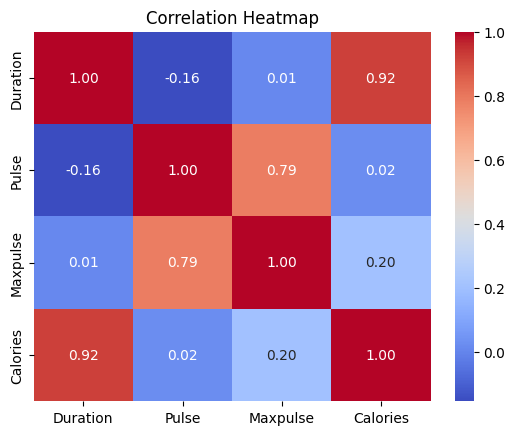

In [21]:
# correlation heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()